# Understanding Path Signatures: From Integrals to "Fingerprints" of Sequences


This notebook builds the intuition behind Path Signatures, a powerful mathematical tool for describing sequences of data. We'll start with the fundamental building block – the integral – and see how it extends from simple areas under curves to describing complex, multi-dimensional paths. This will lay the groundwork for understanding how signatures can capture the essential geometric properties of a data stream, creating a unique "fingerprint" for different types of processes.


## Cell 1: The Integral as a Sum of Tiny Pieces

At its core, an integral is just a way of adding up infinitely many, infinitely small pieces of something. The classic example is finding the area under a curve. We can approximate this area by dividing it into a series of thin rectangles and summing their areas. As we make the rectangles narrower and narrower, our approximation gets closer and closer to the true area.

The animation below shows this process. It visualizes the **Riemann sum** for the function \(f(x) = x^2 + 1\). Watch how the collection of rectangles begins to perfectly match the continuous area under the curve as the animation progresses. This is the fundamental idea of integration.


AttributeError: property 'patches' of 'Axes' object has no setter

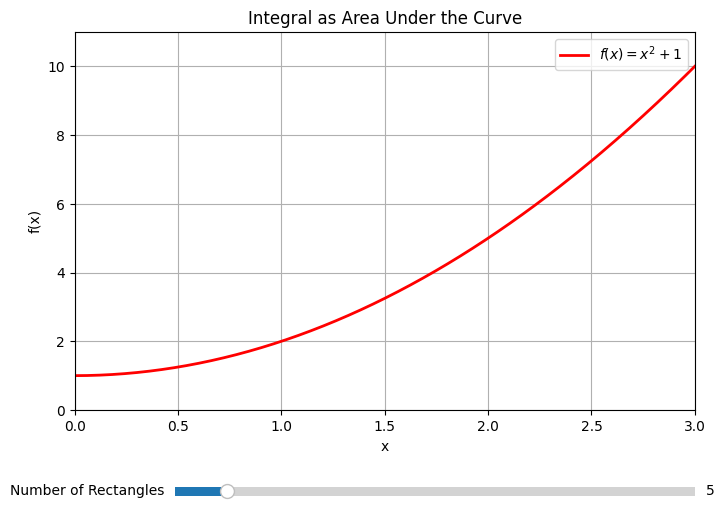

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider

# Define the function and the integration range
def f(x):
    return x**2 + 1

x_range = np.linspace(0, 3, 400)
y_range = f(x_range)

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(bottom=0.25)
ax.plot(x_range, y_range, 'r-', linewidth=2, label='$f(x) = x^2 + 1$')
ax.set_xlim(0, 3)
ax.set_ylim(0, 11)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Integral as Area Under the Curve')
ax.grid(True)
ax.legend()

# Initialize the rectangles patch
rectangles = ax.bar([], [], width=0.1, alpha=0.3, color='blue', align='edge')

def update(num_rects):
    """Updates the plot to show a certain number of rectangles."""
    num_rects = int(num_rects)
    ax.patches = ax.patches[:1] # Keep the original curve
    
    if num_rects == 0:
        # Clear rectangles if slider is at 0
        for p in ax.patches:
            if isinstance(p, plt.Rectangle):
                p.set_height(0)
        return
        
    xs = np.linspace(0, 3, num_rects + 1)
    
    # Clear previous rectangles by setting height to 0
    for p in ax.patches:
        if isinstance(p, plt.Rectangle):
            p.set_height(0)
            
    # Draw new rectangles
    for i in range(num_rects):
        x_i = xs[i]
        y_i = f(x_i)
        width = xs[i+1] - xs[i]
        ax.add_patch(plt.Rectangle((x_i, 0), width, y_i, alpha=0.3, color='blue'))

    ax.set_title(f'Area approximated with {num_rects} rectangles')

# Create the slider
ax_slider = plt.axes([0.25, 0.1, 0.65, 0.03])
slider = Slider(
    ax=ax_slider,
    label='Number of Rectangles',
    valmin=0,
    valmax=50,
    valinit=5,
    valstep=1
)

slider.on_changed(update)

# Initial drawing
update(5)

plt.show()

# Add a key takeaway
print("Key Takeaway: The integral is simply the sum of the areas of an infinite number of these tiny rectangles.")



## Cell 2: Integrating Along a 2D Path

Now, let's take the concept of integration into two dimensions. Instead of a simple function \(f(x)\), imagine a path or a trajectory that evolves over time in an (x, y) plane. This path is defined by two functions, \(x(t)\) and \(y(t)\), where 't' represents time.

Just as we integrated to find the total area under a curve, we can integrate the individual components of the path to find the total displacement in the x and y directions.

- The integral \(\int x'(t) dt\) tells us the total change in the x-coordinate.
- The integral \(\int y'(t) dt\) tells us the total change in the y-coordinate.

The animation below shows a particle moving along a Lissajous curve. As the particle moves, you can see the accumulated change in both the x and y directions plotted on the side graphs. This is the **first-order signature** of the path, capturing the net displacement in each dimension.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the 2D path using parametric equations
t = np.linspace(0, 2 * np.pi, 500)
x_path = np.sin(3 * t + np.pi / 2)
y_path = np.sin(2 * t)

# Calculate the cumulative integrals (displacements)
# This is equivalent to integrating the velocity, which gives the position.
integral_x = np.cumsum(x_path) * (t[1] - t[0])
integral_y = np.cumsum(y_path) * (t[1] - t[0])

# Set up the plot
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(2, 2)

ax_path = fig.add_subplot(gs[:, 0])
ax_int_x = fig.add_subplot(gs[0, 1])
ax_int_y = fig.add_subplot(gs[1, 1])

# Plot the full path in grey for reference
ax_path.plot(x_path, y_path, 'k--', alpha=0.3, label='Full Path')
ax_path.set_title('2D Path')
ax_path.set_xlabel('x(t)')
ax_path.set_ylabel('y(t)')
ax_path.set_aspect('equal', 'box')
ax_path.grid(True)

# Main path plot (will be animated)
line_path, = ax_path.plot([], [], 'b-', linewidth=2)
point_path, = ax_path.plot([], [], 'bo', markersize=8)

# Integral of x(t) plot
ax_int_x.set_title("Accumulated Change in X: $\int x(t) dt$")
ax_int_x.set_xlim(t.min(), t.max())
ax_int_x.set_ylim(integral_x.min() - 0.1, integral_x.max() + 0.1)
ax_int_x.set_xlabel('Time (t)')
ax_int_x.grid(True)
line_int_x, = ax_int_x.plot([], [], 'g-', linewidth=2)

# Integral of y(t) plot
ax_int_y.set_title("Accumulated Change in Y: $\int y(t) dt$")
ax_int_y.set_xlim(t.min(), t.max())
ax_int_y.set_ylim(integral_y.min() - 0.1, integral_y.max() + 0.1)
ax_int_y.set_xlabel('Time (t)')
ax_int_y.grid(True)
line_int_y, = ax_int_y.plot([], [], 'r-', linewidth=2)

fig.tight_layout()

# Animation function
def animate(i):
    # Update path
    line_path.set_data(x_path[:i], y_path[:i])
    point_path.set_data(x_path[i], y_path[i])
    
    # Update integral plots
    line_int_x.set_data(t[:i], integral_x[:i])
    line_int_y.set_data(t[:i], integral_y[:i])
    
    return line_path, point_path, line_int_x, line_int_y

# Create animation
ani = FuncAnimation(fig, animate, frames=len(t), interval=20, blit=True)

plt.show()

# Add a key takeaway
print("Key Takeaway: The first-order signature of a path is simply the collection of integrals of its individual components. It tells us the net displacement in each direction.")



## Cell 3: Second-Order Signatures - Capturing Interactions

The first-order signature was useful, but it only told us about the net change in each direction independently. What if we want to know how the movements in x and y *relate* to each other? For instance, does an increase in x typically happen at the same time as an increase in y?

This is where **second-order signatures** come in. These are *iterated integrals*. For a 2D path, there are four second-order terms:

- \(\int (\int dx_s) dx_t\): How the change in x is influenced by past changes in x.
- \(\int (\int dy_s) dx_t\): How the change in x is influenced by past changes in y.
- \(\int (\int dx_s) dy_t\): How the change in y is influenced by past changes in x.
- \(\int (\int dy_s) dy_t\): How the change in y is influenced by past changes in y.

The term \(\int (\int dy_s) dx_t\) (often written as \(\int y_s dx_t\)) gives a signed measure of the **area** swept out by the path and the x-axis. If the path encloses an area in a counter-clockwise direction, this integral will be positive. If it's clockwise, it will be negative.

The visualization below calculates this specific iterated integral. Notice how the accumulated area grows and shrinks as the path evolves. This single number captures a crucial geometric property of the path that the first-order integrals missed entirely.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the 2D path again
t = np.linspace(0, 2 * np.pi, 500)
x_path = np.sin(3 * t + np.pi / 2)
y_path = np.sin(2 * t)

# Calculate the second-order iterated integral: integral(y(t) * dx/dt) dt
# This is a discrete approximation of the area integral.
dx = np.gradient(x_path, t)
iterated_integral = np.cumsum(y_path * dx) * (t[1] - t[0])

# Set up the plot
fig, (ax_path, ax_area) = plt.subplots(1, 2, figsize=(12, 6))

# --- Path Plot ---
ax_path.plot(x_path, y_path, 'k--', alpha=0.3, label='Full Path')
ax_path.set_title('2D Path and Swept Area')
ax_path.set_xlabel('x(t)')
ax_path.set_ylabel('y(t)')
ax_path.set_aspect('equal', 'box')
ax_path.grid(True)
line_path, = ax_path.plot([], [], 'b-', linewidth=2)
point_path, = ax_path.plot([], [], 'bo', markersize=8)
fill_area = ax_path.fill_between(x_path[:1], y_path[:1], alpha=0.3, color='cyan')

# --- Iterated Integral Plot ---
ax_area.set_title("Second-Order Signature: $\int y(t) dx(t)$")
ax_area.set_xlim(t.min(), t.max())
ax_area.set_ylim(iterated_integral.min() - 0.1, iterated_integral.max() + 0.1)
ax_area.set_xlabel('Time (t)')
ax_area.set_ylabel('Accumulated Area')
ax_area.grid(True)
line_area, = ax_area.plot([], [], 'c-', linewidth=2)

fig.tight_layout()

# Animation function
def animate(i):
    global fill_area
    # Update path
    line_path.set_data(x_path[:i], y_path[:i])
    point_path.set_data(x_path[i], y_path[i])
    
    # Update fill area
    fill_area.remove()
    fill_area = ax_path.fill_between(x_path[:i], y_path[:i], alpha=0.3, color='cyan')

    # Update integral plot
    line_area.set_data(t[:i], iterated_integral[:i])
    
    return line_path, point_path, line_area, fill_area

# Create animation
ani = FuncAnimation(fig, animate, frames=len(t), interval=20, blit=True)

plt.show()

print(f"Key Takeaway: The final value of the iterated integral is {iterated_integral[-1]:.2f}.")
print("This single number, a second-order signature term, captures the net area swept out by the path, revealing how the x and y movements are intertwined.")



## Cell 4: Putting It All Together - The Path Signature

The **path signature** is the infinite collection of all possible iterated integrals of a path. We can't compute the whole infinite series, so in practice, we truncate it at a certain level.

- **Level 0**: Just a single value, 1. It's the starting point.
- **Level 1**: The first-order integrals. For a 2D path, this is a vector of length 2: \((\int dx_t, \int dy_t)\). It captures the net displacement.
- **Level 2**: The second-order iterated integrals. For a 2D path, this is a 2x2 matrix of 4 values: \((\int\int dx_s dx_t, \int\int dy_s dx_t, \int\int dx_s dy_t, \int\int dy_s dy_t)\). It captures areas and relational movements.
- **Level 3 and higher**: These capture even more complex geometric properties, like volume, torsion, and curvature.

The signature provides a rich, hierarchical summary of the path. Crucially, it is independent of how fast the path is traversed (re-parametrization invariance) and effectively summarizes the path's shape.

### Interactive Demo

**Instructions:**
1. Run the cell below.
2. A drawing canvas will appear. **Click and drag** on the canvas to draw a 2D path.
3. As you draw, the bar charts on the right will update in real-time to show the signature components of your path up to Level 2.
4. Try drawing different shapes:
    - A straight line
    - A circle (try both clockwise and counter-clockwise)
    - A figure-eight
5. Observe how the signature "fingerprint" changes for each shape. For example, a closed loop will have zero net displacement (Level 1 terms are zero), but non-zero area terms (Level 2).


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

# Helper function to compute the signature up to level 2
def compute_signature_level_2(path):
    """
    Computes the signature of a 2D path up to level 2.
    The path is expected to be an (N, 2) numpy array.
    """
    if len(path) < 2:
        return {
            "level_1": np.zeros(2),
            "level_2": np.zeros((2, 2))
        }

    # Increments of the path
    increments = np.diff(path, axis=0)
    
    # Level 1: Net displacement
    level_1 = np.sum(increments, axis=0)
    
    # Level 2: Iterated integrals
    level_2 = np.zeros((2, 2))
    
    # We use a discrete approximation for the iterated integrals
    # S(X)_ij = sum_{k=1}^{n-1} X_k^i * sum_{l=1}^{k} dX_l^j is not quite right.
    # The correct formula for the iterated integral is sum_{k=1}^{n-1} sum_{l=1}^{k-1} dx_k^i dx_l^j
    # A simpler approximation is using trapezoidal rule: sum (X_k^i + X_{k-1}^i)/2 * dX_k^j
    
    x_vals = path[:, 0]
    y_vals = path[:, 1]
    dx = increments[:, 0]
    dy = increments[:, 1]
    
    # S_11 = integral(x dx) = 0.5 * (x_n^2 - x_0^2)
    level_2[0, 0] = 0.5 * (x_vals[-1]**2 - x_vals[0]**2)
    
    # S_22 = integral(y dy) = 0.5 * (y_n^2 - y_0^2)
    level_2[1, 1] = 0.5 * (y_vals[-1]**2 - y_vals[0]**2)
    
    # S_12 = integral(x dy) and S_21 = integral(y dx)
    # Using trapezoidal rule for these cross-terms
    level_2[0, 1] = np.sum(0.5 * (x_vals[:-1] + x_vals[1:]) * dy)
    level_2[1, 0] = np.sum(0.5 * (y_vals[:-1] + y_vals[1:]) * dx)
    
    return {
        "level_1": level_1,
        "level_2": level_2.flatten() # Flatten for easy plotting
    }


# --- Interactive Drawing Canvas Setup ---
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(2, 2, width_ratios=[1.5, 1])

# The drawing canvas
ax_draw = fig.add_subplot(gs[:, 0])
ax_draw.set_title("Click and Drag to Draw a Path")
ax_draw.set_xlim(0, 1)
ax_draw.set_ylim(0, 1)
ax_draw.set_aspect('equal', 'box')
ax_draw.grid(True)
line, = ax_draw.plot([], [], 'b-', lw=2)

# Signature plots
ax_sig1 = fig.add_subplot(gs[0, 1])
ax_sig1.set_title("Signature Level 1 (Displacement)")
ax_sig1.set_ylabel("Value")
bar1 = ax_sig1.bar(['$\int dx$', '$\int dy$'], [0, 0], color=['green', 'red'])

ax_sig2 = fig.add_subplot(gs[1, 1])
ax_sig2.set_title("Signature Level 2 (Area & Relations)")
ax_sig2.set_ylabel("Value")
bar2 = ax_sig2.bar(['$\int\int dxdx$', '$\int\int dydx$', '$\int\int dxdy$', '$\int\int dydy$'], [0,0,0,0], color=['g', 'r', 'g', 'r'])
plt.setp(ax_sig2.get_xticklabels(), rotation=30, ha="right")


fig.tight_layout()

# --- Interactivity Logic ---
class PathDrawer:
    def __init__(self, line_widget, sig_bars_1, sig_bars_2):
        self.line = line_widget
        self.sig_bars_1 = sig_bars_1
        self.sig_bars_2 = sig_bars_2
        self.is_drawing = False
        self.path = []
        self.cid_press = self.line.figure.canvas.mpl_connect('button_press_event', self.on_press)
        self.cid_release = self.line.figure.canvas.mpl_connect('button_release_event', self.on_release)
        self.cid_motion = self.line.figure.canvas.mpl_connect('motion_notify_event', self.on_motion)

    def on_press(self, event):
        if event.inaxes != self.line.axes: return
        self.is_drawing = True
        self.path = [(event.xdata, event.ydata)]
        self.line.set_data([], [])
        self.line.figure.canvas.draw()

    def on_release(self, event):
        self.is_drawing = False

    def on_motion(self, event):
        if not self.is_drawing or event.inaxes != self.line.axes: return
        self.path.append((event.xdata, event.ydata))
        x, y = zip(*self.path)
        self.line.set_data(x, y)
        self.update_signatures()
        self.line.figure.canvas.draw()
        
    def update_signatures(self):
        path_np = np.array(self.path)
        if len(path_np) > 1:
            signature = compute_signature_level_2(path_np)
            
            # Update Level 1 bars
            for rect, h in zip(self.sig_bars_1, signature["level_1"]):
                rect.set_height(h)
            ax_sig1.relim()
            ax_sig1.autoscale_view()

            # Update Level 2 bars
            for rect, h in zip(self.sig_bars_2, signature["level_2"]):
                rect.set_height(h)
            ax_sig2.relim()
            ax_sig2.autoscale_view()

    def clear(self, event):
        self.path = []
        self.line.set_data([], [])
        self.update_signatures()
        self.line.figure.canvas.draw()

# Attach the drawer
drawer = PathDrawer(line, bar1, bar2)

# Add a clear button
ax_clear = plt.axes([0.35, 0.02, 0.1, 0.04])
button = Button(ax_clear, 'Clear', hovercolor='0.975')
button.on_clicked(drawer.clear)

plt.show()



## Summary & Next Steps

In this notebook, we have built the intuition for the path signature from the ground up.

1.  We started with the simple **integral** as a sum of small pieces.
2.  We extended this to **integrating along a 2D path**, which gave us the Level 1 signature terms (net displacement).
3.  We introduced **iterated integrals** to capture the relationships *between* the path's components, which gave us the Level 2 signature terms (capturing area and interaction).
4.  Finally, we combined these into the concept of the **Path Signature**, a rich, hierarchical description of a path's geometry.

The interactive demo showed that different shapes produce unique signature "fingerprints." This is the foundation for the next notebook, where we will apply this tool to distinguish between different types of random, stochastic processes.


## Dependencies

To run this notebook, you will need the following Python libraries:
```
numpy
matplotlib
ipywidgets
jupyter
```
